In [ ]:
import datetime as dt
from datetime import date
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor ,ExtraTreesRegressor,GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import seaborn as sns

In [ ]:

today = date.today()
print(today)
tdy = (today.strftime('%Y,%m,%d')).split(',')
print(tdy)
start = dt.datetime(2019,1,1)
end = dt.datetime(int(tdy[0]),int(tdy[1]),int(tdy[2]))


BTC = web.DataReader('BTC-USD' ,'yahoo', start , end)
ETH = web.DataReader('ETH-USD' ,'yahoo', start , end)
LTC = web.DataReader('LTC-USD' ,'yahoo', start , end)
XRP = web.DataReader('XRP-USD' ,'yahoo', start , end)
ADA= web.DataReader('ADA-USD' ,'yahoo', start , end)
BNB= web.DataReader('BNB-USD' ,'yahoo', start , end)
SOL = web.DataReader('SOL-USD' ,'yahoo', start , end)


2022-07-20
['2022', '07', '20']


In [ ]:
BTC['price_diff'] = BTC['Close']- BTC['Open']
ETH['price_diff'] = ETH['Close']- ETH['Open']
LTC['price_diff'] = LTC['Close']- LTC['Open']
XRP['price_diff'] = XRP['Close']- XRP['Open']
ADA['price_diff'] = ADA['Close']- ADA['Open']
BNB['price_diff'] = BNB['Close']- BNB['Open']
SOL['price_diff'] = SOL['Close']- SOL['Open']


print(BTC)
print(ETH)
print(LTC)

                    High           Low          Open         Close  \
Date                                                                 
2019-01-01   3850.913818   3707.231201   3746.713379   3843.520020   
2019-01-02   3947.981201   3817.409424   3849.216309   3943.409424   
2019-01-03   3935.685059   3826.222900   3931.048584   3836.741211   
2019-01-04   3865.934570   3783.853760   3832.040039   3857.717529   
2019-01-05   3904.903076   3836.900146   3851.973877   3845.194580   
...                  ...           ...           ...           ...   
2022-07-16  21514.404297  20518.898438  20834.103516  21190.316406   
2022-07-17  21600.640625  20778.179688  21195.041016  20779.343750   
2022-07-18  22633.033203  20781.912109  20781.912109  22485.689453   
2022-07-19  23666.962891  21683.406250  22467.849609  23389.433594   
2022-07-20  24195.335938  23021.623047  23393.863281  23651.259766   

                 Volume     Adj Close   price_diff  
Date                                

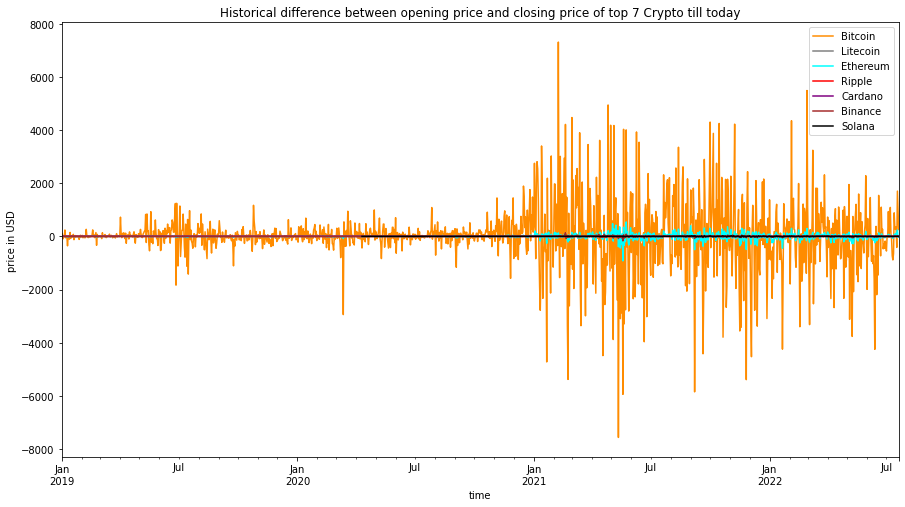

In [ ]:
plt.figure(figsize=(15,8))
(BTC['price_diff']).plot(color='darkorange', label='Bitcoin')
(LTC['price_diff']).plot(color='grey', label='Litecoin')
(ETH['price_diff']).plot(color='cyan', label='Ethereum')
(XRP['price_diff']).plot(color='red', label='Ripple')
(ADA['price_diff']).plot(color='purple', label='Cardano')
(BNB['price_diff']).plot(color='brown', label='Binance')
(SOL['price_diff']).plot(color='black', label='Solana')

plt.xlabel('time')
plt.ylabel('price in USD')
plt.title('Historical difference between opening price and closing price of top 7 Crypto till today')
plt.legend()
plt.show()

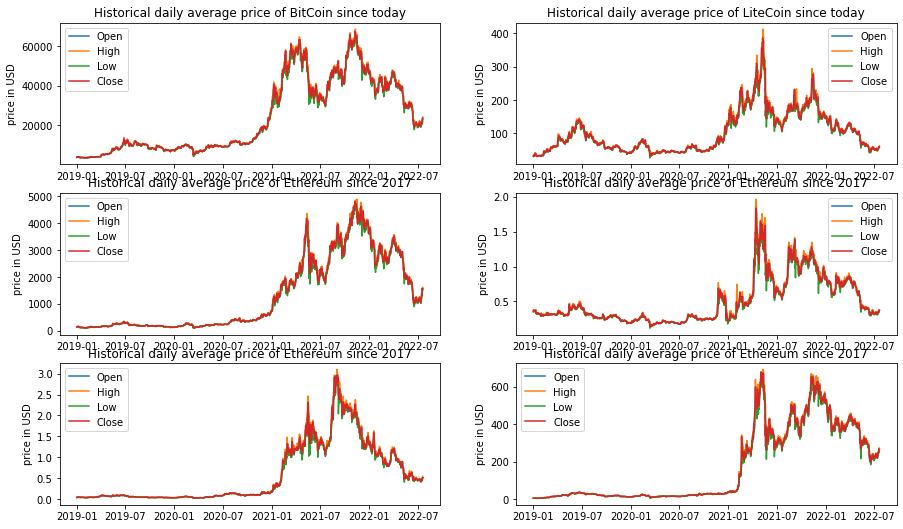

In [ ]:
plt.figure(figsize=(15, 12))
plt.subplot(4,2,1)
plt.plot(BTC[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of BitCoin since today')
plt.legend(['Open','High','Low','Close'])

plt.subplot(4,2,2)
plt.plot(LTC[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of LiteCoin since today')
plt.legend(['Open','High','Low','Close'])

plt.subplot(4,2,3)
plt.plot(ETH[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['Open','High','Low','Close'])

plt.subplot(4,2,4)
plt.plot(XRP[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['Open','High','Low','Close'])

plt.subplot(4,2,5)
plt.plot(ADA[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['Open','High','Low','Close'])

plt.subplot(4,2,6)
plt.plot(BNB[['Open','High','Low','Close']])
plt.ylabel('price in USD')
plt.title('Historical daily average price of Ethereum since 2017')
plt.legend(['Open','High','Low','Close'])



In [ ]:
BTC['daily_avg'] = (BTC['Open'] + BTC['High'] + BTC['Low'] + BTC['Close'])
ETH['daily_avg'] = (ETH['Open'] + ETH['High'] + ETH['Low'] + ETH['Close'])
LTC['daily_avg'] = (LTC['Open'] + LTC['High'] + LTC['Low'] + LTC['Close'])
XRP['daily_avg'] = (XRP['Open'] + XRP['High'] + XRP['Low'] + XRP['Close'])
ADA['daily_avg'] = (ADA['Open'] + ADA['High'] + ADA['Low'] + ADA['Close'])
BNB['daily_avg'] = (BNB['Open'] + BNB['High'] + BNB['Low'] + BNB['Close'])

BTC['daily_avg_After_Month']=BTC['daily_avg'].shift(-30)
X_BTC = BTC.dropna().drop(['daily_avg_After_Month','daily_avg'], axis=1)
y_BTC = BTC.dropna()['daily_avg_After_Month']
X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC = train_test_split(X_BTC, y_BTC, test_size=0.2, random_state=43)
X_forecast_BTC =  BTC.tail(30).drop(['daily_avg_After_Month','daily_avg'], axis=1)


ETH['daily_avg_After_Month']=ETH['daily_avg'].shift(-30)
X_ETH = ETH.dropna().drop(['daily_avg_After_Month','daily_avg'], axis=1)
y_ETH = ETH.dropna()['daily_avg_After_Month']
X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH = train_test_split(X_ETH, y_ETH, test_size=0.2, random_state=43)
X_forecast_ETH =  ETH.tail(30).drop(['daily_avg_After_Month','daily_avg'], axis=1)

LTC['daily_avg_After_Month']=LTC['daily_avg'].shift(-30)
X_LTC = LTC.dropna().drop(['daily_avg_After_Month','daily_avg'], axis=1)
y_LTC = LTC.dropna()['daily_avg_After_Month']
X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC = train_test_split(X_LTC, y_LTC, test_size=0.2, random_state=43)
X_forecast_LTC =  LTC.tail(30).drop(['daily_avg_After_Month','daily_avg'], axis=1)

XRP['daily_avg_After_Month']=XRP['daily_avg'].shift(-30)
X_XRP = XRP.dropna().drop(['daily_avg_After_Month','daily_avg'], axis=1)
y_XRP = XRP.dropna()['daily_avg_After_Month']
X_train_XRP, X_test_XRP, y_train_XRP, y_test_XRP = train_test_split(X_XRP, y_XRP, test_size=0.2, random_state=43)
X_forecast_XRP =  XRP.tail(30).drop(['daily_avg_After_Month','daily_avg'], axis=1)

ADA['daily_avg_After_Month']=ADA['daily_avg'].shift(-30)
X_ADA = ADA.dropna().drop(['daily_avg_After_Month','daily_avg'], axis=1)
y_ADA = ADA.dropna()['daily_avg_After_Month']
X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(X_ADA, y_ADA, test_size=0.2, random_state=43)
X_forecast_LTC =  ADA.tail(30).drop(['daily_avg_After_Month','daily_avg'], axis=1)

In [ ]:
def regression(X_train, X_test, y_train, y_test):
    Regressor = {
        'Random Forest Regressor': RandomForestRegressor(n_estimators=200),
        'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=500),
        'ExtraTrees Regressor': ExtraTreesRegressor(n_estimators=500, min_samples_split=5),
        #'Bayesian Ridge': BayesianRidge(),
        #'Elastic Net CV': ElasticNetCV()
    }

    for name, clf in Regressor.items():
        print(name)
        clf.fit(X_train, y_train)
    
        print(f'R2: {r2_score(y_test, clf.predict(X_test)):.2f}')
        print(f'MAE: {mean_absolute_error(y_test, clf.predict(X_test)):.2f}')
        print(f'MSE: {mean_squared_error(y_test, clf.predict(X_test)):.2f}')
        print()

In [ ]:
print('Bitcoin (BTC):')
regression(X_train_BTC, X_test_BTC, y_train_BTC, y_test_BTC)

print('Ethereum (ETH):')
regression(X_train_ETH, X_test_ETH, y_train_ETH, y_test_ETH)

print('Litecoin (LTC):')
regression(X_train_LTC, X_test_LTC, y_train_LTC, y_test_LTC)

print('Litecoin (XRP):')
regression(X_train_XRP, X_test_XRP, y_train_XRP, y_test_XRP)

print('Litecoin (ADA):')
regression(X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA)

Bitcoin (BTC):
Random Forest Regressor
R2: 0.91
MAE: 13841.87
MSE: 529625312.40

Gradient Boosting Regressor
R2: 0.88
MAE: 15905.25
MSE: 683430253.33

ExtraTrees Regressor
R2: 0.91
MAE: 13452.81
MSE: 501114824.24

Ethereum (ETH):
Random Forest Regressor
R2: 0.91
MAE: 938.75
MSE: 2754206.73

Gradient Boosting Regressor
R2: 0.88
MAE: 1079.40
MSE: 3608255.67

ExtraTrees Regressor
R2: 0.91
MAE: 925.63
MSE: 2702854.73

Litecoin (LTC):
Random Forest Regressor
R2: 0.79
MAE: 79.29
MSE: 14964.08

Gradient Boosting Regressor
R2: 0.75
MAE: 87.07
MSE: 17634.69

ExtraTrees Regressor
R2: 0.79
MAE: 77.43
MSE: 14663.94

Litecoin (XRP):
Random Forest Regressor
R2: 0.79
MAE: 0.39
MSE: 0.38

Gradient Boosting Regressor
R2: 0.75
MAE: 0.43
MSE: 0.46

ExtraTrees Regressor
R2: 0.76
MAE: 0.41
MSE: 0.43

Litecoin (ADA):
Random Forest Regressor
R2: 0.89
MAE: 0.48
MSE: 0.92

Gradient Boosting Regressor
R2: 0.87
MAE: 0.52
MSE: 1.08

ExtraTrees Regressor
R2: 0.88
MAE: 0.49
MSE: 0.98



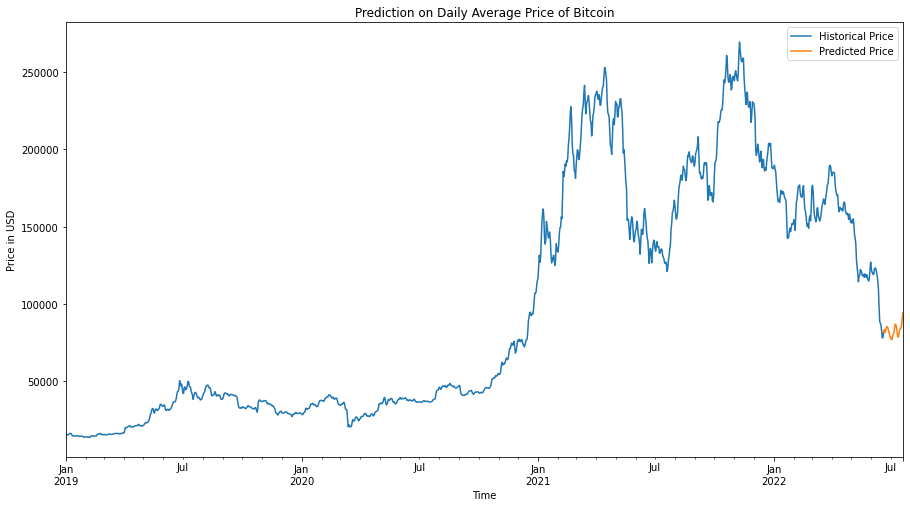

In [ ]:
plt.figure(figsize=(15,8))
(BTC[:-30]['daily_avg']).plot(label='Historical Price')
(BTC[-31:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

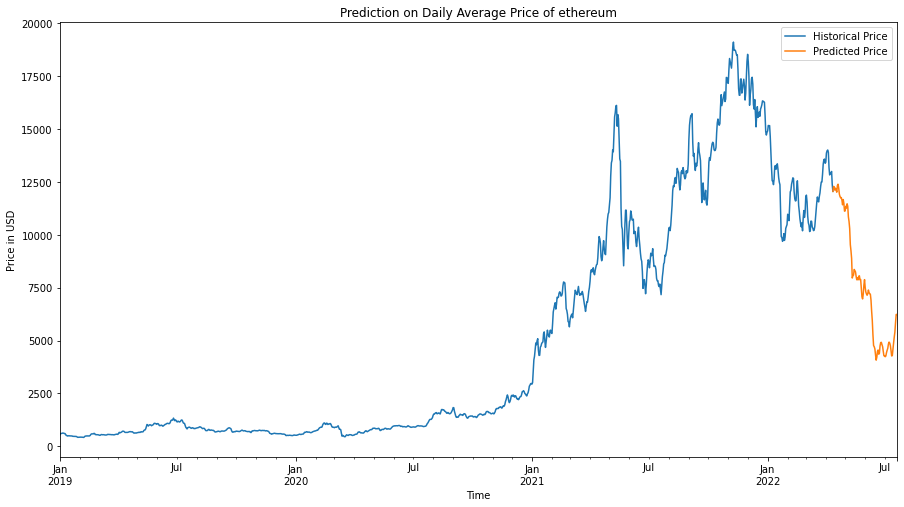

In [ ]:
plt.figure(figsize=(15,8))
(ETH[:-99]['daily_avg']).plot(label='Historical Price')
(ETH[-100:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of ethereum')
plt.legend()
plt.show()

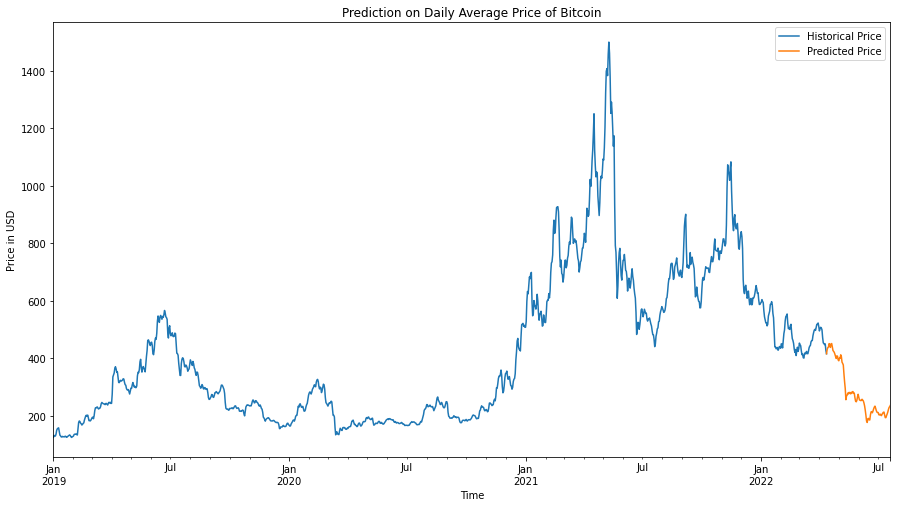

In [ ]:
plt.figure(figsize=(15,8))
(LTC[:-99]['daily_avg']).plot(label='Historical Price')
(LTC[-100:]['daily_avg']).plot(label='Predicted Price')

plt.xlabel('Time')
plt.ylabel('Price in USD')
plt.title('Prediction on Daily Average Price of Bitcoin')
plt.legend()
plt.show()

In [ ]:
btc = BTC[['Close']]
btc.columns = ['BTC']
btc_ma=btc.rolling(window=5).mean()

eth = ETH[['Close']]
eth.columns = ['ETH']
eth_ma=eth.rolling(window=5).mean()

ltc = LTC[['Close']]
ltc.columns = ['LTC']
ltc_ma=ltc.rolling(window=5).mean()

xrp = XRP[['Close']]
xrp.columns = ['XRP']
xrp_ma=xrp.rolling(window=5).mean()

ada = ADA[['Close']]
ada.columns = ['ADA']
ada_ma=ltc.rolling(window=5).mean()


close = pd.concat([btc,ltc,eth,xrp,ada], axis=1)
close_ma = pd.concat([btc_ma,ltc_ma,eth_ma,xrp_ma,ada_ma], axis=1)
close_ma.tail()

,BTC,LTC,ETH,XRP,LTC
Date,,,,,
2022-07-16,20426.510547,51.049509,1185.812134,0.330801,51.049509
2022-07-17,20717.596484,52.685303,1245.900952,0.337152,52.685303
2022-07-18,21172.319531,54.497935,1338.927100,0.345641,54.497935
2022-07-19,21736.222266,55.851014,1409.216895,0.353642,55.851014
2022-07-20,22299.208594,57.485860,1474.509814,0.360269,57.485860


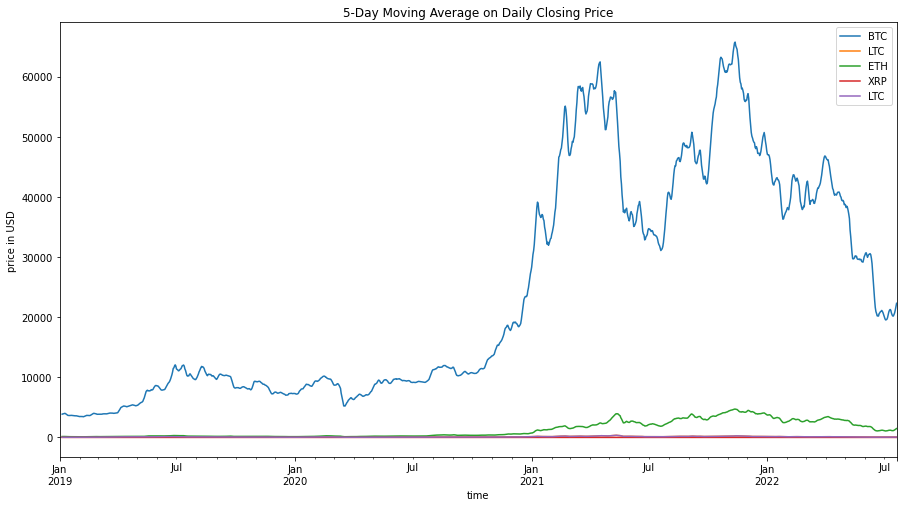

In [ ]:
close_ma.plot(figsize=(15,8))
plt.title('5-Day Moving Average on Daily Closing Price')
plt.xlabel('time')
plt.ylabel('price in USD')
plt.show()

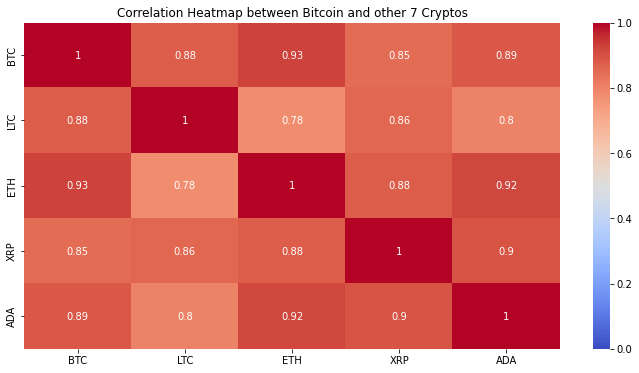

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(close.corr(),vmin=0, vmax=1, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap between Bitcoin and other 7 Cryptos')
plt.show()


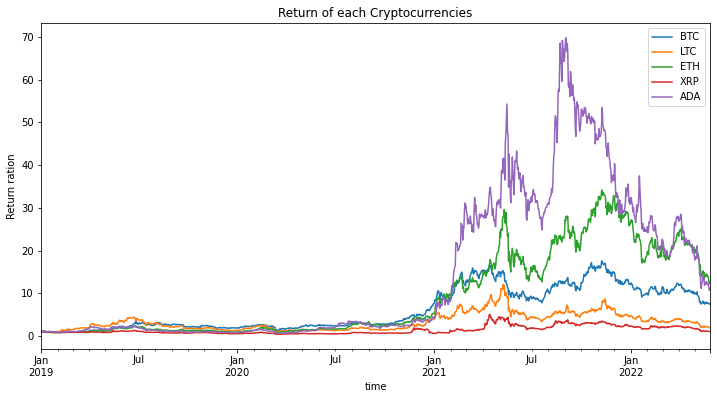

In [ ]:
returns = close.apply(lambda x: x/x[0])
returns.plot(figsize=(12,6))
plt.ylabel('Return ration')
plt.xlabel('time')
plt.title('Return of each Cryptocurrencies')
plt.show()


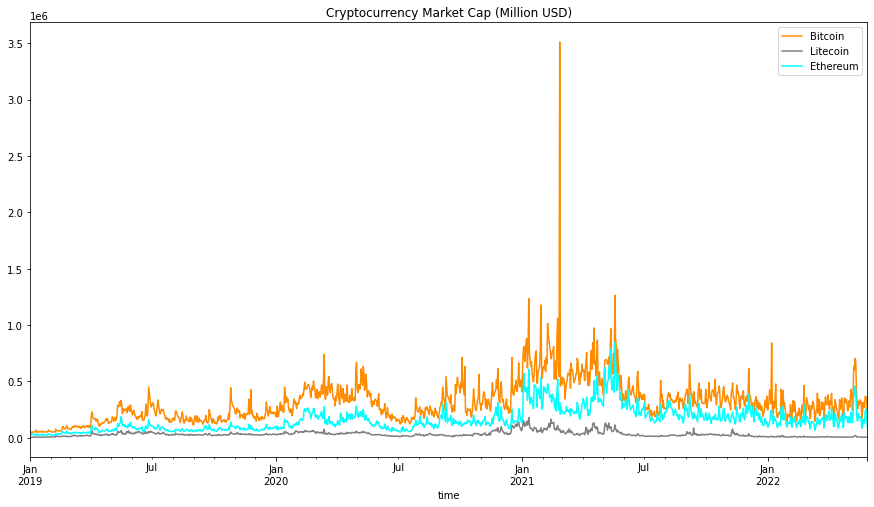

In [ ]:
plt.figure(figsize=(15,8))
(BTC['Volume']/100000).plot(color='darkorange', label='Bitcoin')
(LTC['Volume']/100000).plot(color='grey', label='Litecoin')
(ETH['Volume']/100000).plot(color='cyan', label='Ethereum')


plt.legend()
plt.xlabel('time')
plt.title('Cryptocurrency Market Cap (Million USD)')
plt.show()

In [ ]:
!pip install -- upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [ ]:
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 32.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
